<a href="https://colab.research.google.com/github/khizerzakir/ERASMUS-CDE/blob/main/Lightning_reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Import Python packages ####
import sys
import os
import glob
from netCDF4 import Dataset, num2date
import numpy as np
import csv
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



In [ ]:
!pip install git+https://github.com/SciTools/cartopy.git netCDF4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SciTools/cartopy.git to /tmp/pip-req-build-0kc3zgqz
  Running command git clone --filter=blob:none --quiet https://github.com/SciTools/cartopy.git /tmp/pip-req-build-0kc3zgqz
  Resolved https://github.com/SciTools/cartopy.git to commit 3eeb2c054429fd22848cc90752ead6736c61f48d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.5 MB/s eta 0:00:00


In [ ]:
#Initial file path. It can be changed by passing a different path as an argument
#to the main() function
files = '/content/sample_data/Untitled Folder'


In [ ]:

import pandas as pd
from netCDF4 import Dataset




In [ ]:
# Initialize an empty list to store the unique variables
unique_vars = []

# Loop through each file in the folder
for file_name in os.listdir(files):
    if file_name.endswith('.nc'):
        # Open the netCDF file
        dataset = Dataset(os.path.join(files, file_name))
        
        # Append the unique variables to the list
        for var_name in dataset.variables.keys():
            if var_name not in unique_vars:
                unique_vars.append(var_name)
                
# Create an empty pandas dataframe to store the values
df = pd.DataFrame(columns=unique_vars)

# Loop through each file in the folder
for file_name in os.listdir(files):
    if file_name.endswith('.nc'):
        # Open the netCDF file
        dataset = Dataset(os.path.join(files, file_name))
        
        # Initialize an empty dictionary to store the variable values
        var_values = {}
        
        # Loop through each unique variable
        for var_name in unique_vars:
            # Check if the variable exists in the file
            if var_name in dataset.variables.keys():
                # Get the variable value
                var_value = dataset.variables[var_name][:]
                
                # Add the variable value to the dictionary
                #var_values[var_name] = var_value.tolist()
            else:
                # Add None to the dictionary if the variable does not exist in the file
                var_values[var_name] = None
        
        # Append the variable values to the pandas dataframe
        df = df.append(var_values, ignore_index=True)
        
# Save the dataframe as a CSV file
#df.to_csv('variable_values.csv', index=False)

<ipython-input-23-66bd0de809d5>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(var_values, ignore_index=True)
<ipython-input-23-66bd0de809d5>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = df.append(var_values, ignore_index=True)
<ipython-input-23-66bd0de809d5>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(var_values, ignore_index=True)
<ipython-input-23-66bd0de809d5>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = df.append(var_values, ignore_index=True)
<ipython-input-23-66bd0de809d5>:41: FutureWarning: The frame.append method i

In [ ]:
df = pd.DataFrame(columns=['file_name', 'latitude', 'longitude', 'orbit_start', 'orbit_end'])

# Loop through each file in the folder
for file_name in os.listdir(files):
    if file_name.endswith('.nc'):
        # Open the netCDF file
        dataset = Dataset(os.path.join(files, file_name))
        
        # Get the latitude, longitude, orbit start, and orbit end arrays
        lat = dataset.variables['lightning_flash_lat'][:]
        lon = dataset.variables['lightning_flash_lon'][:]
        orbit_start = dataset.variables['orbit_summary_TAI93_start'][:]
        orbit_end = dataset.variables['orbit_summary_TAI93_end'][:]
        
        # Create a temporary dataframe to hold the results for this file
        temp_df = pd.DataFrame({
            'file_name': [file_name]*len(lat),
            'latitude': lat,
            'longitude': lon,
            'orbit_start': orbit_start,
            'orbit_end': orbit_end
        })
        
        # Append the temporary dataframe to the main dataframe
        df = df.append(temp_df, ignore_index=True)
print(df)
# Export the DataFrame to CSV
df.to_csv('output.csv', index=False)

<ipython-input-4-710f6196722e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-4-710f6196722e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-4-710f6196722e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-4-710f6196722e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-4-710f6196722e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

                                   file_name   latitude  longitude  \
0     ISS_LIS_SC_V2.2_20230401_121826_NQC.nc  43.844212  13.126719   
1     ISS_LIS_SC_V2.2_20230401_121826_NQC.nc  43.853065  13.113312   
2     ISS_LIS_SC_V2.2_20230401_121826_NQC.nc  43.839417  13.178570   
3     ISS_LIS_SC_V2.2_20230401_121826_NQC.nc  43.851246  13.115234   
4     ISS_LIS_SC_V2.2_20230401_121826_NQC.nc  43.848289  12.963377   
...                                      ...        ...        ...   
1317  ISS_LIS_SC_V2.2_20230401_012816_NQC.nc -25.949011 -39.970261   
1318  ISS_LIS_SC_V2.2_20230401_012816_NQC.nc -26.842958 -38.220421   
1319  ISS_LIS_SC_V2.2_20230401_012816_NQC.nc -26.043592 -38.771194   
1320  ISS_LIS_SC_V2.2_20230401_012816_NQC.nc -31.774563 -30.831034   
1321  ISS_LIS_SC_V2.2_20230401_012816_NQC.nc -31.678492 -30.815071   

      orbit_start    orbit_end  
0     954505116.2  954510689.2  
1     954505116.2  954510689.2  
2     954505116.2  954510689.2  
3     954505116.2  95451068

<ipython-input-4-710f6196722e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-4-710f6196722e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-4-710f6196722e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-4-710f6196722e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


# New Section

ISS_LIS_SC_V2.2_20230401_121826_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

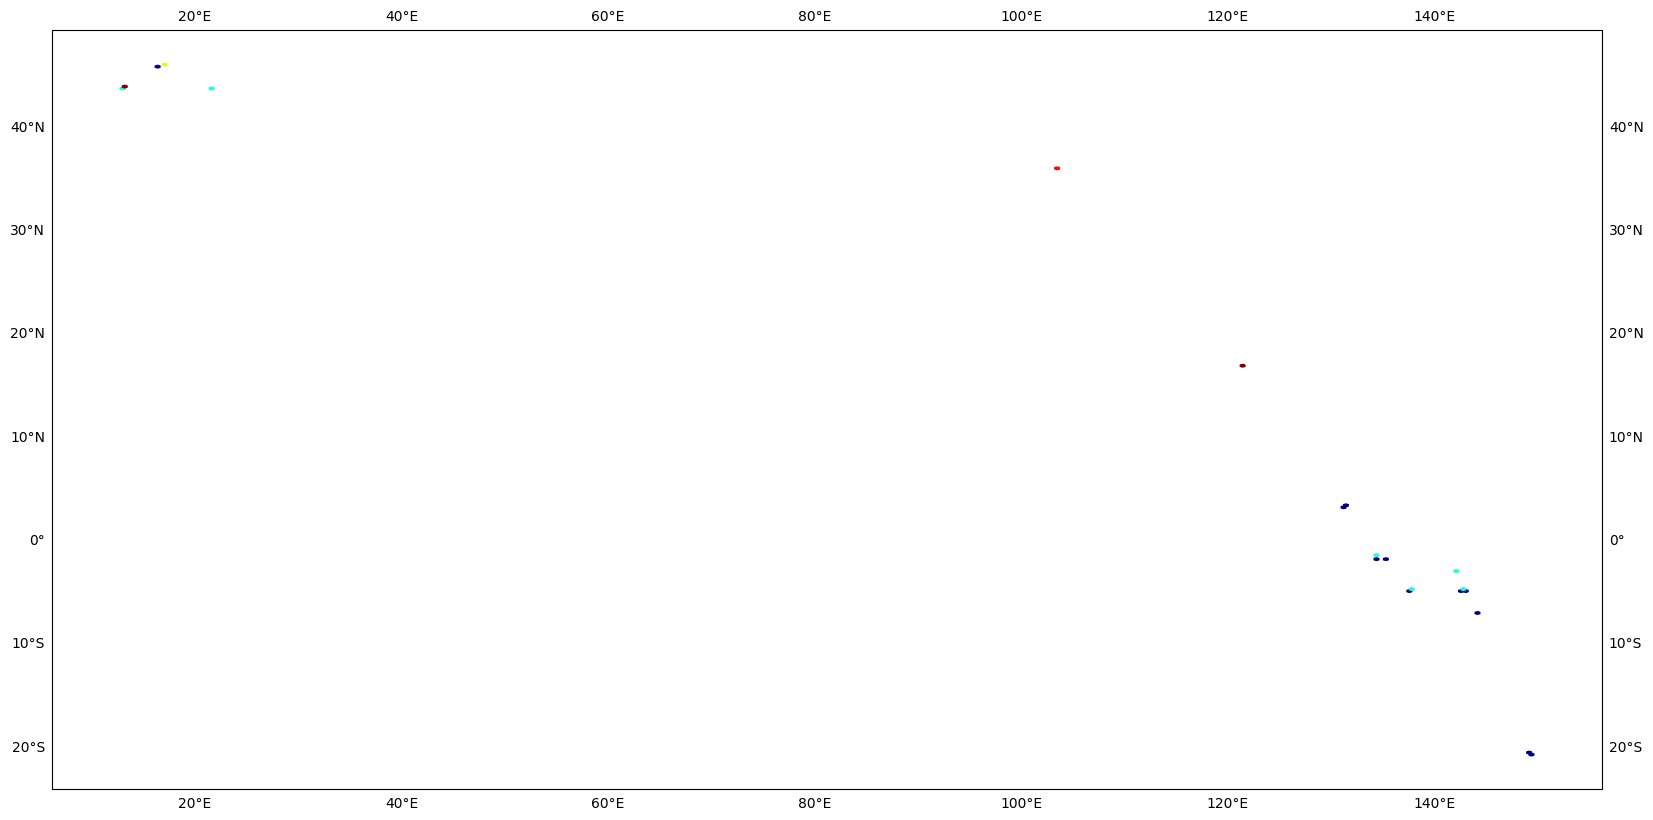

ISS_LIS_SC_V2.2_20230401_030109_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

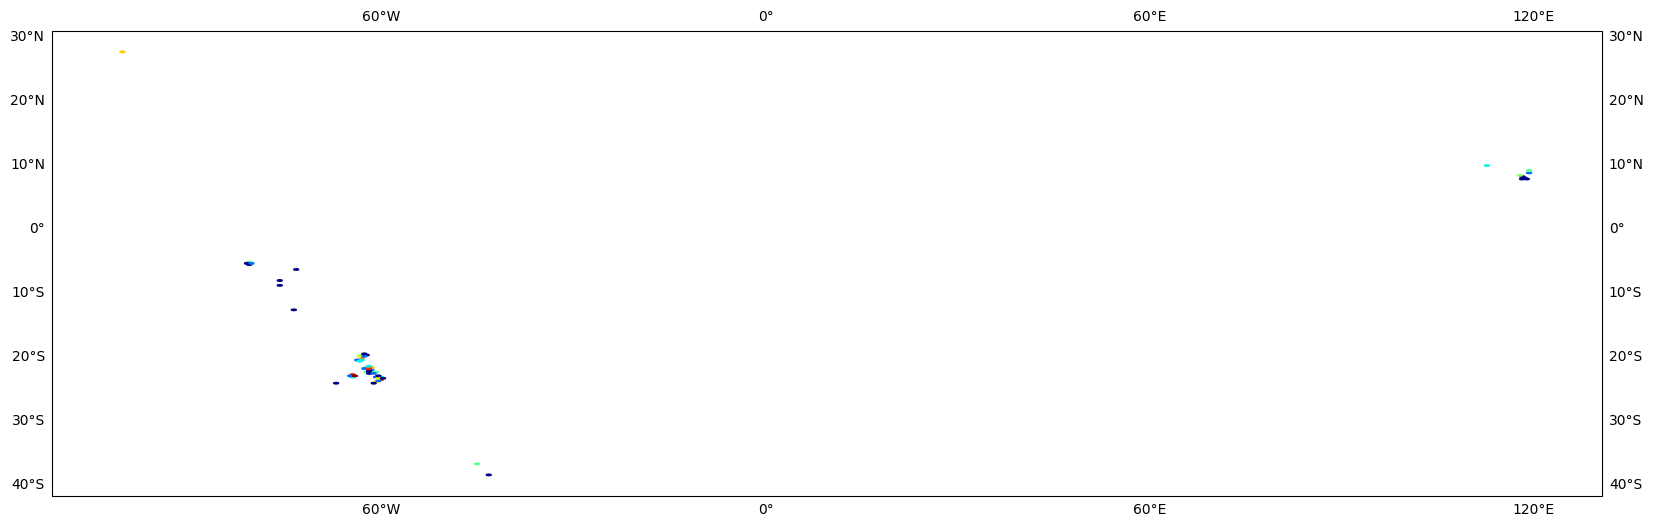

ISS_LIS_SC_V2.2_20230401_104533_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

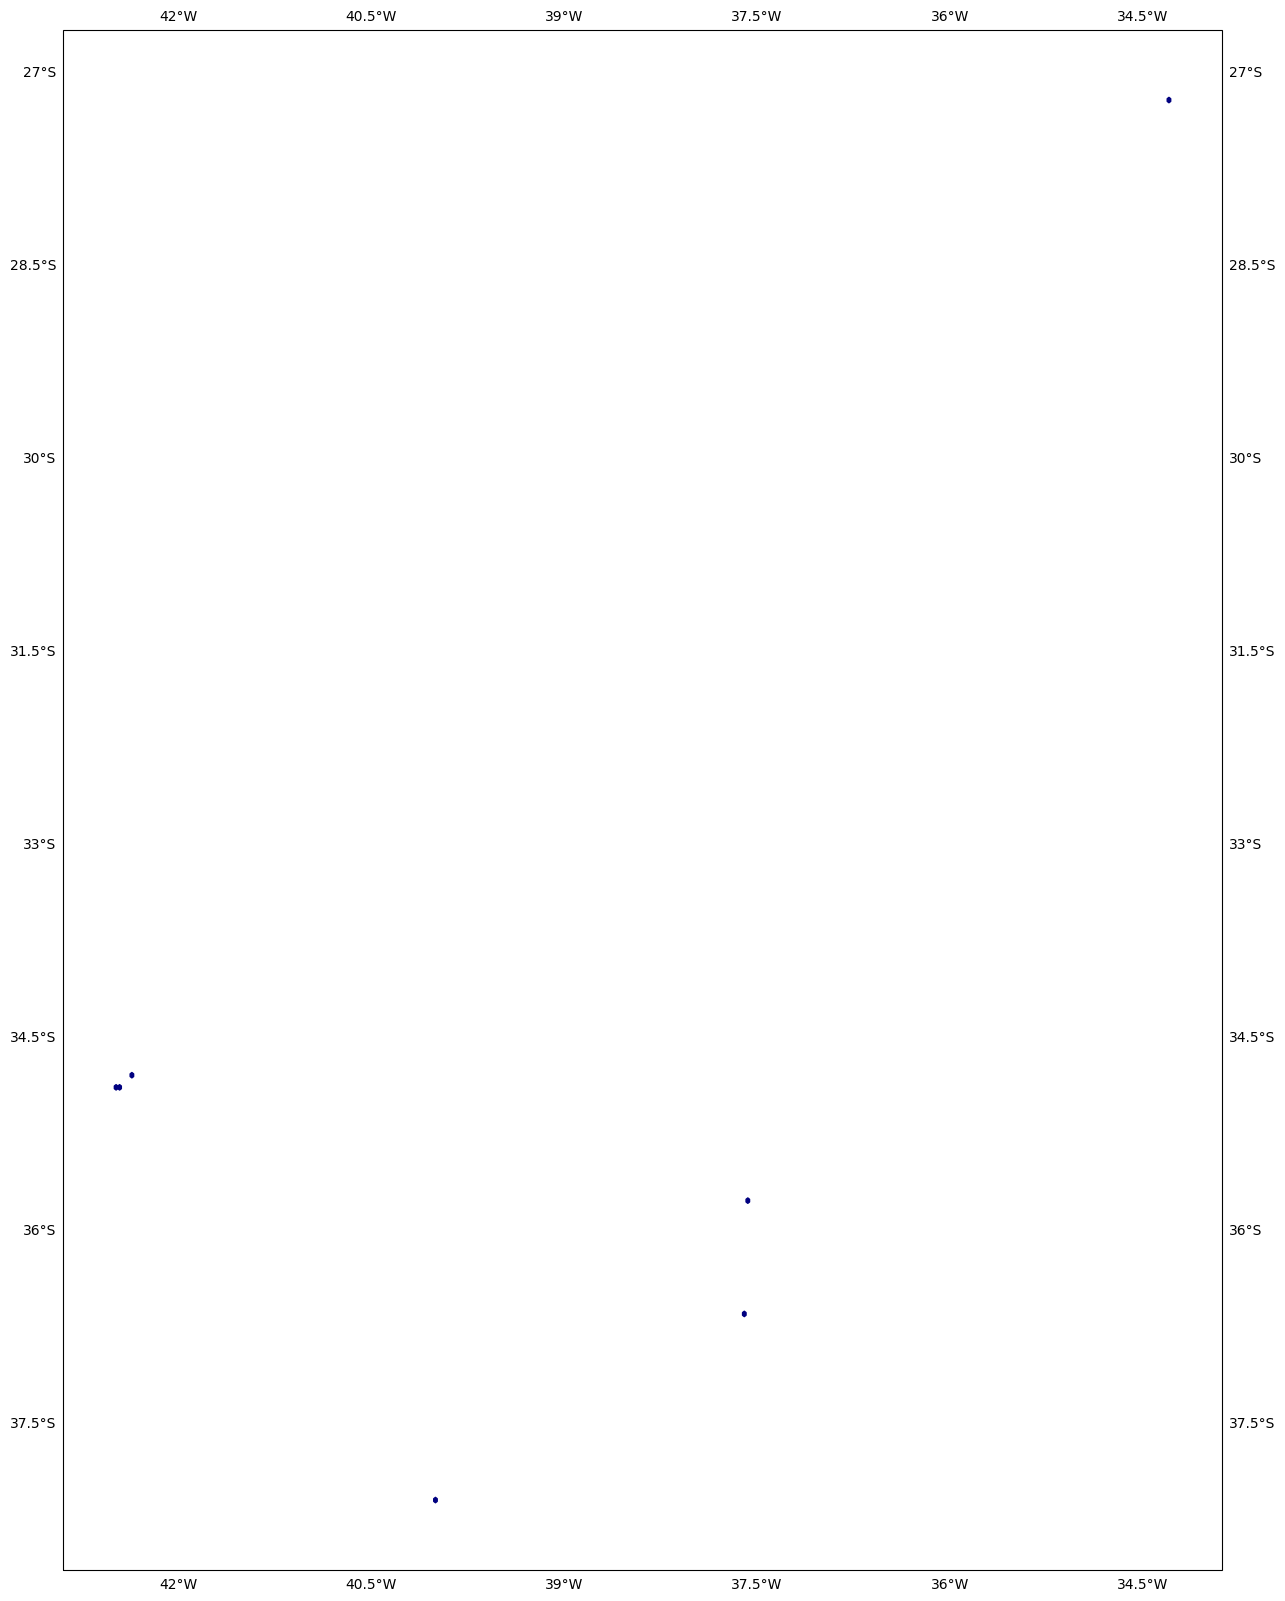

ISS_LIS_SC_V2.2_20230401_135119_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

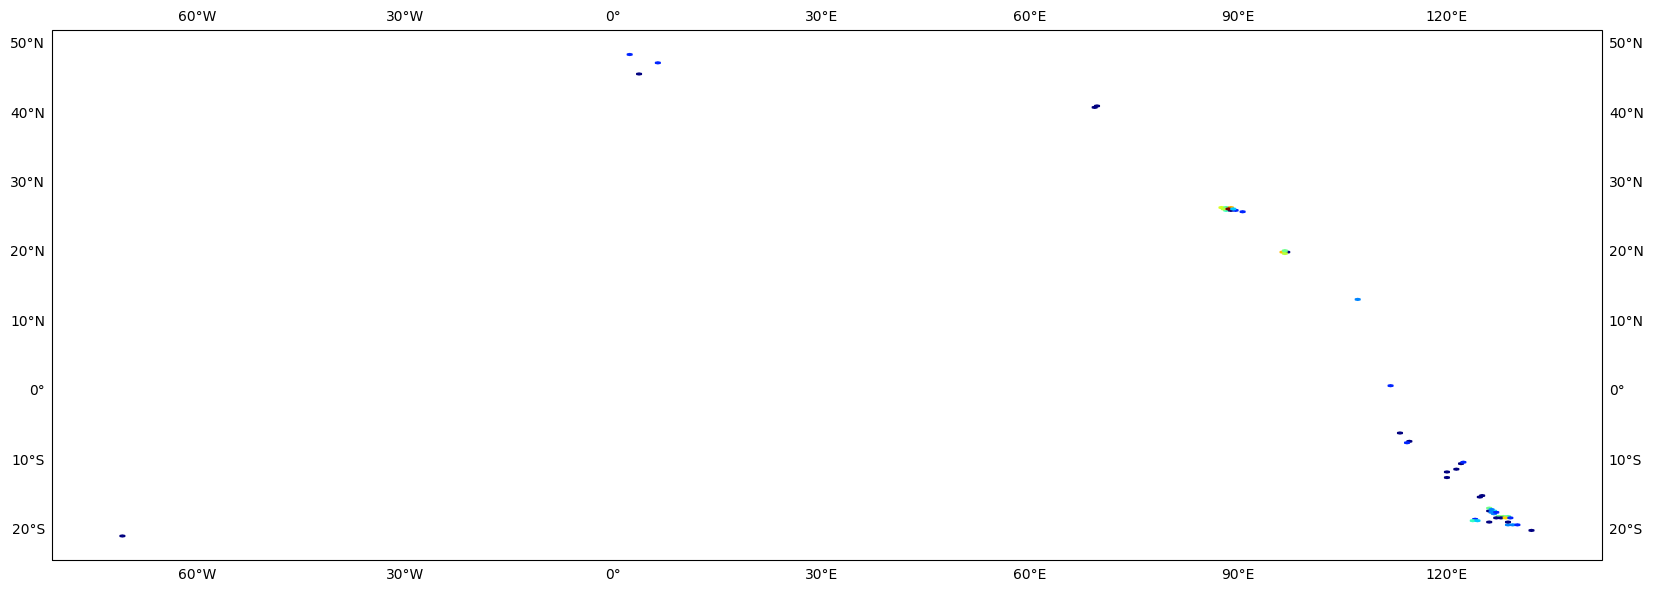

ISS_LIS_SC_V2.2_20230401_182957_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

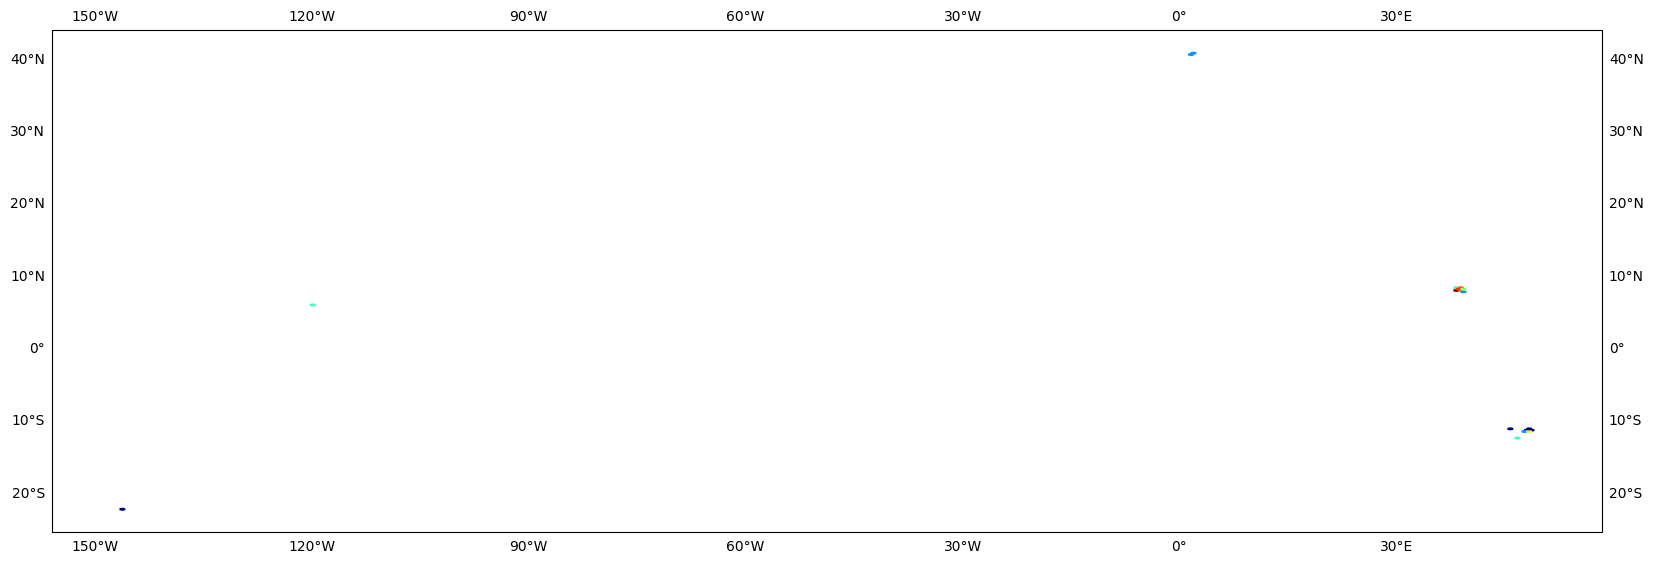

ISS_LIS_SC_V2.2_20230401_213542_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

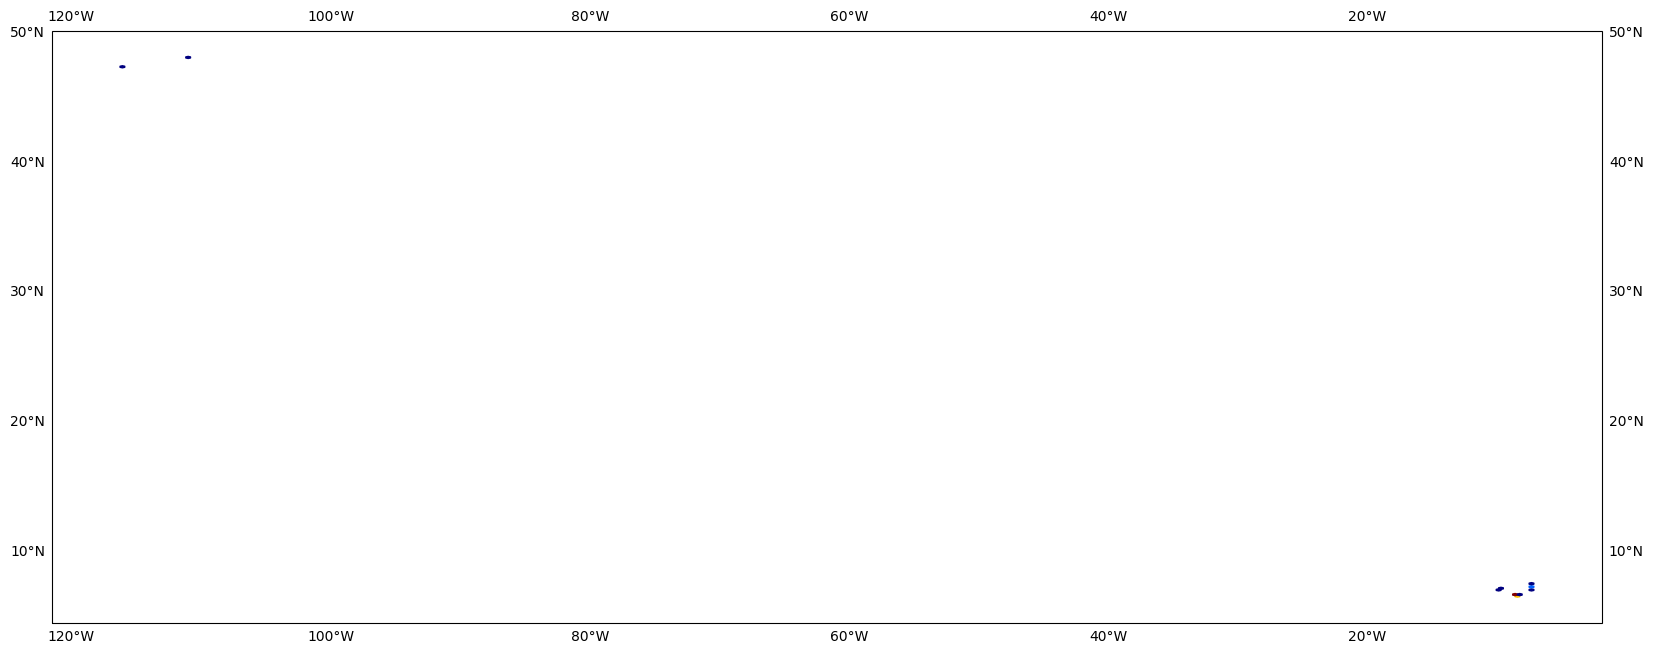

ISS_LIS_SC_V2.2_20230401_073948_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

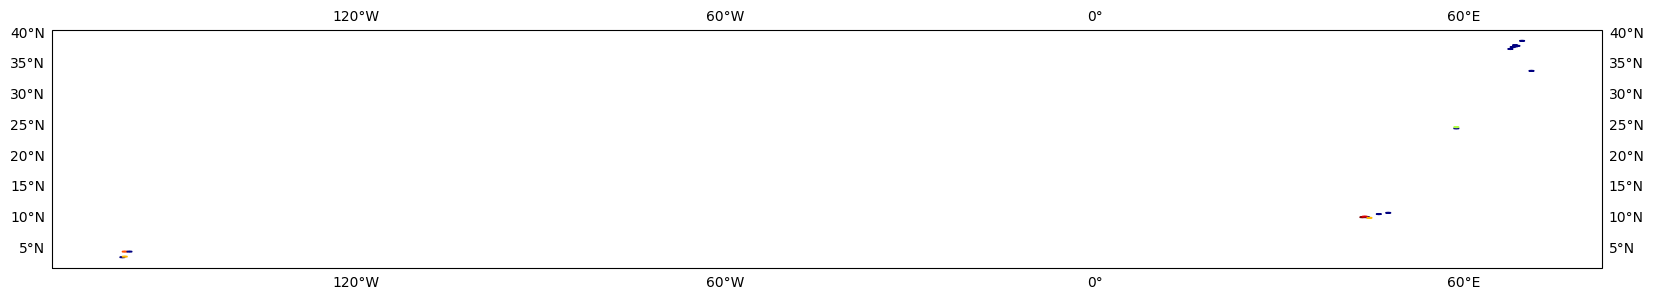

ISS_LIS_SC_V2.2_20230401_200250_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

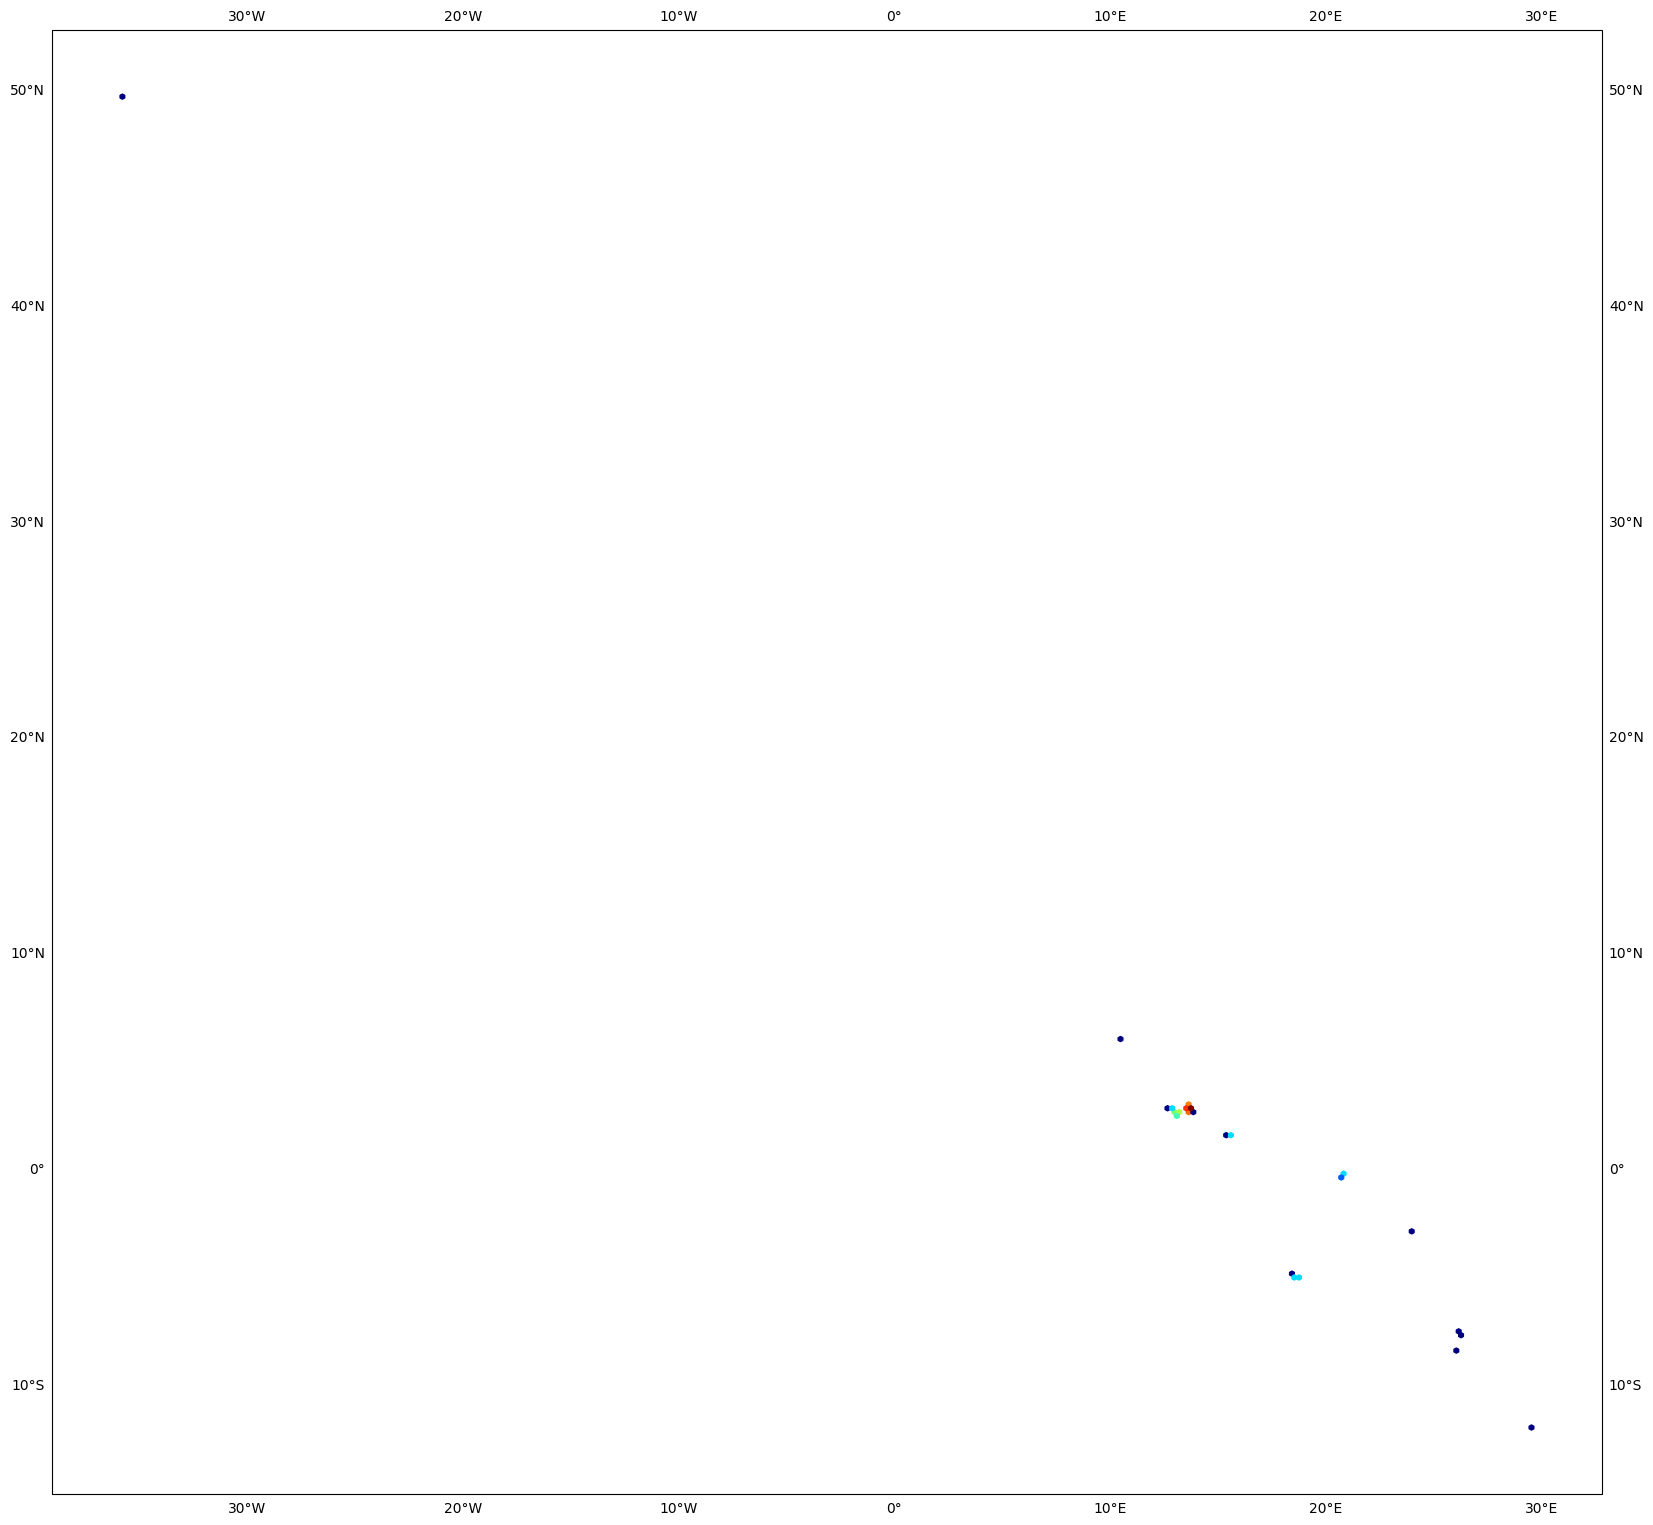

ISS_LIS_SC_V2.2_20230401_230835_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

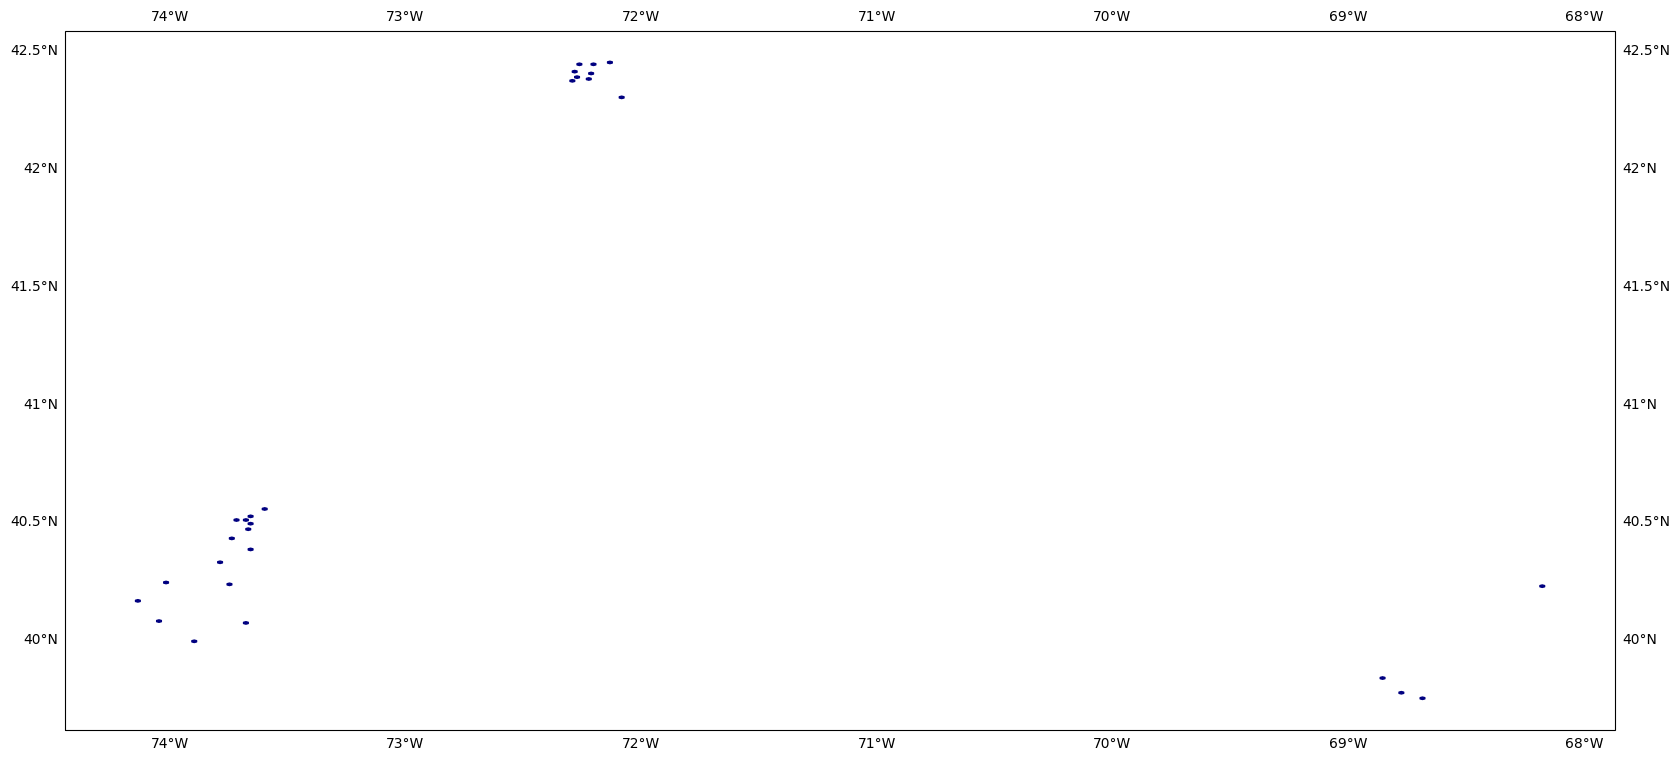

ISS_LIS_SC_V2.2_20230401_091240_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

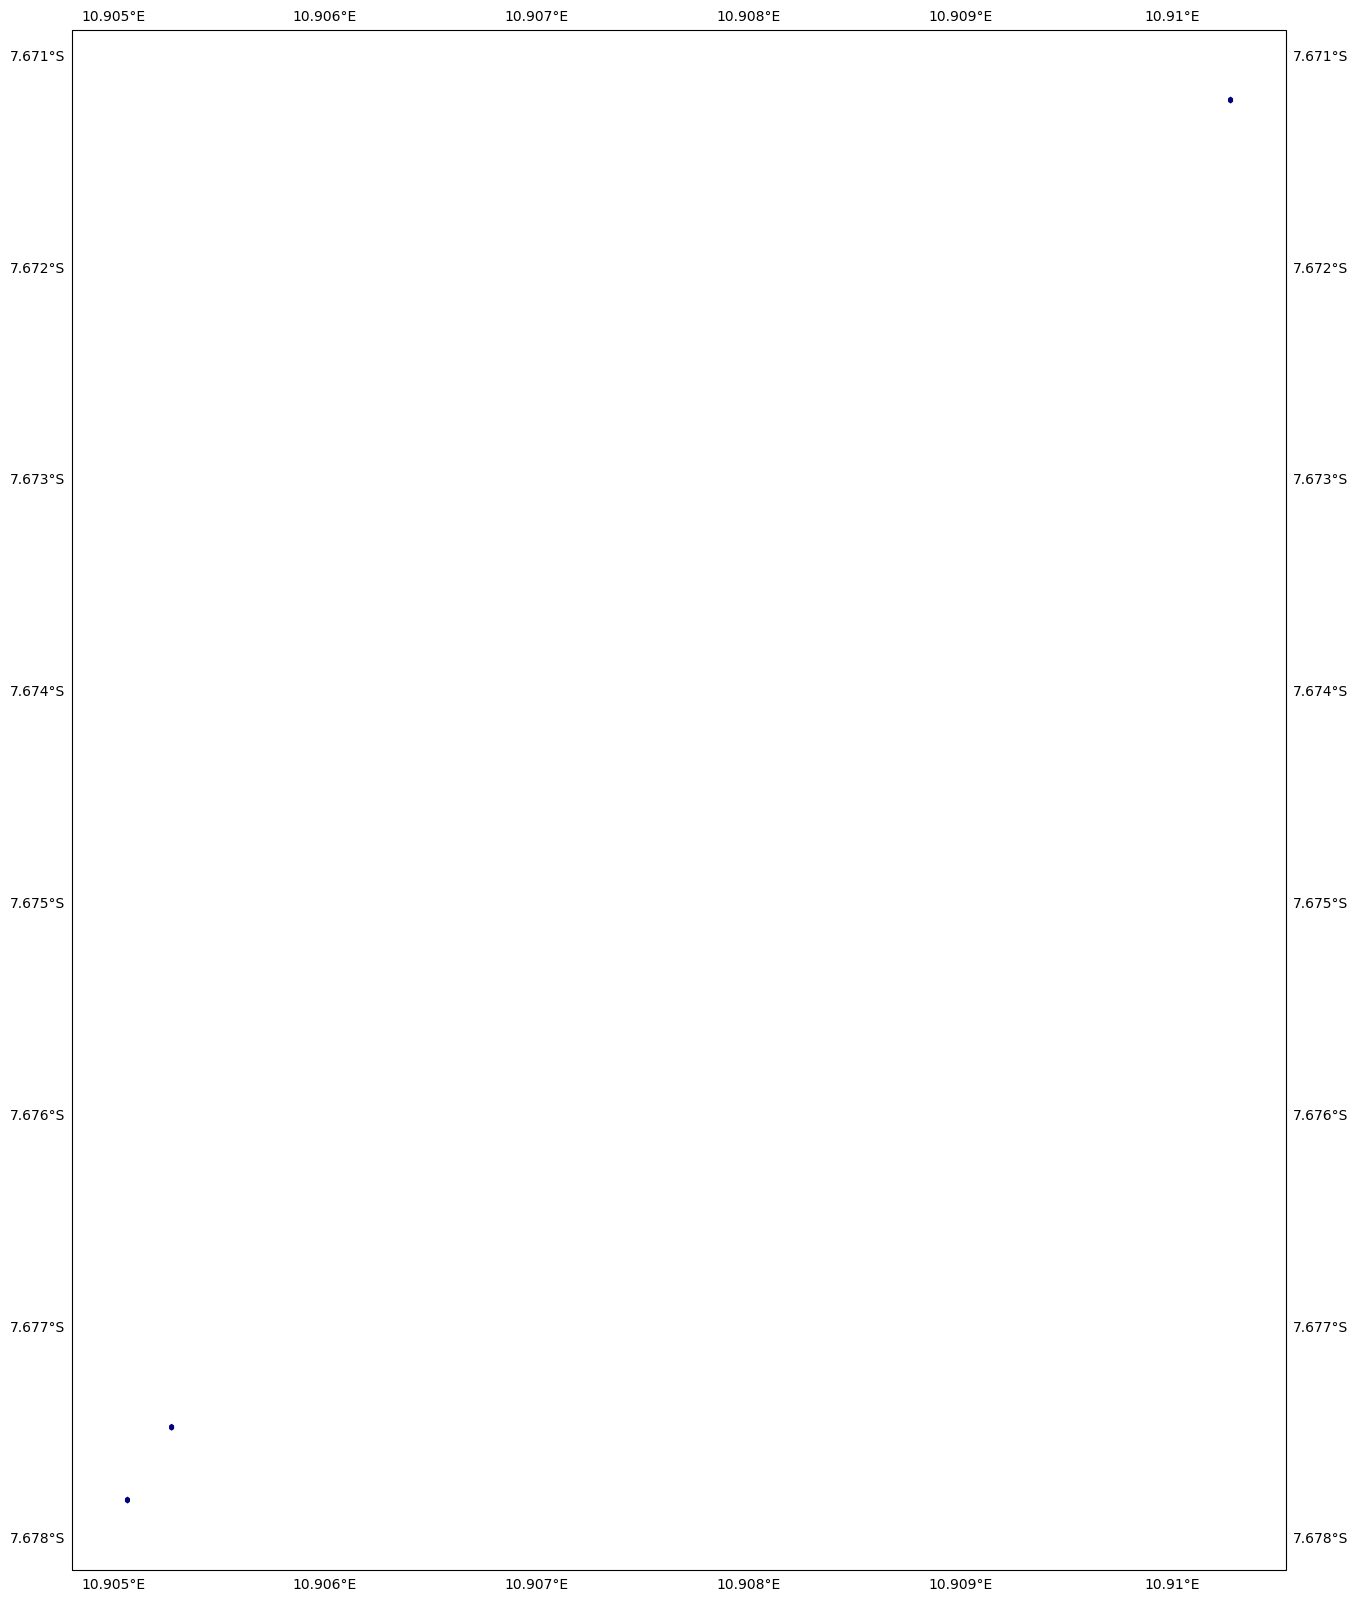

ISS_LIS_SC_V2.2_20230401_152412_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

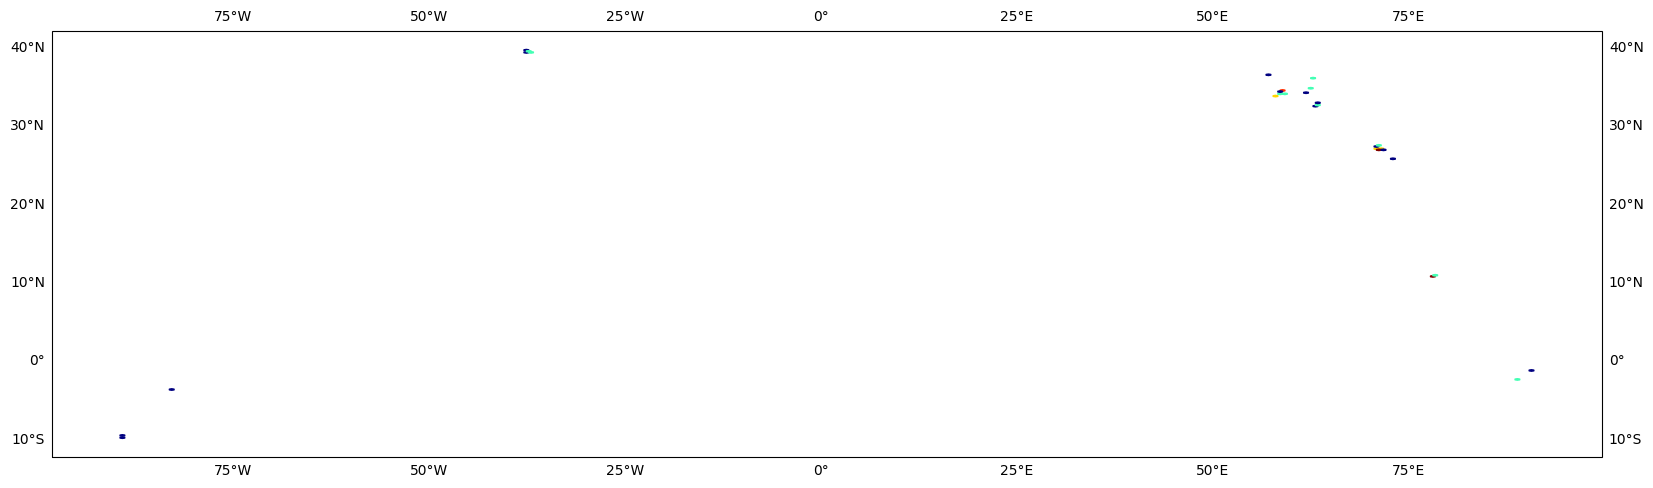

ISS_LIS_SC_V2.2_20230401_165704_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

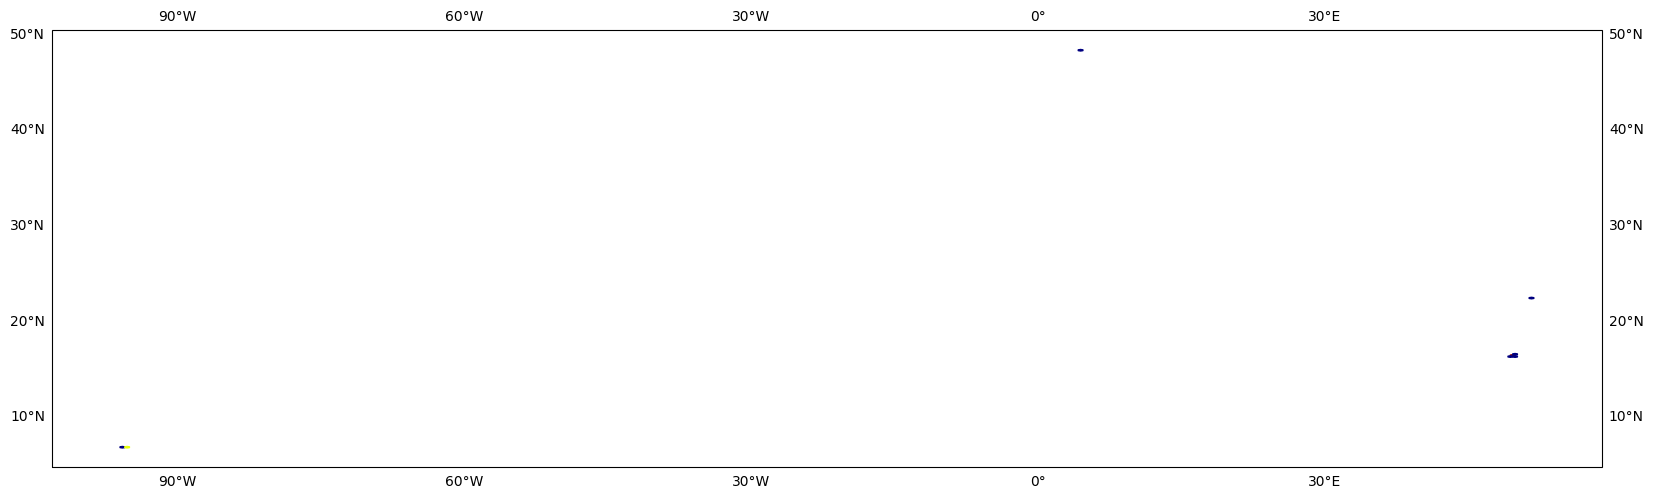

ISS_LIS_SC_V2.2_20230401_060655_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

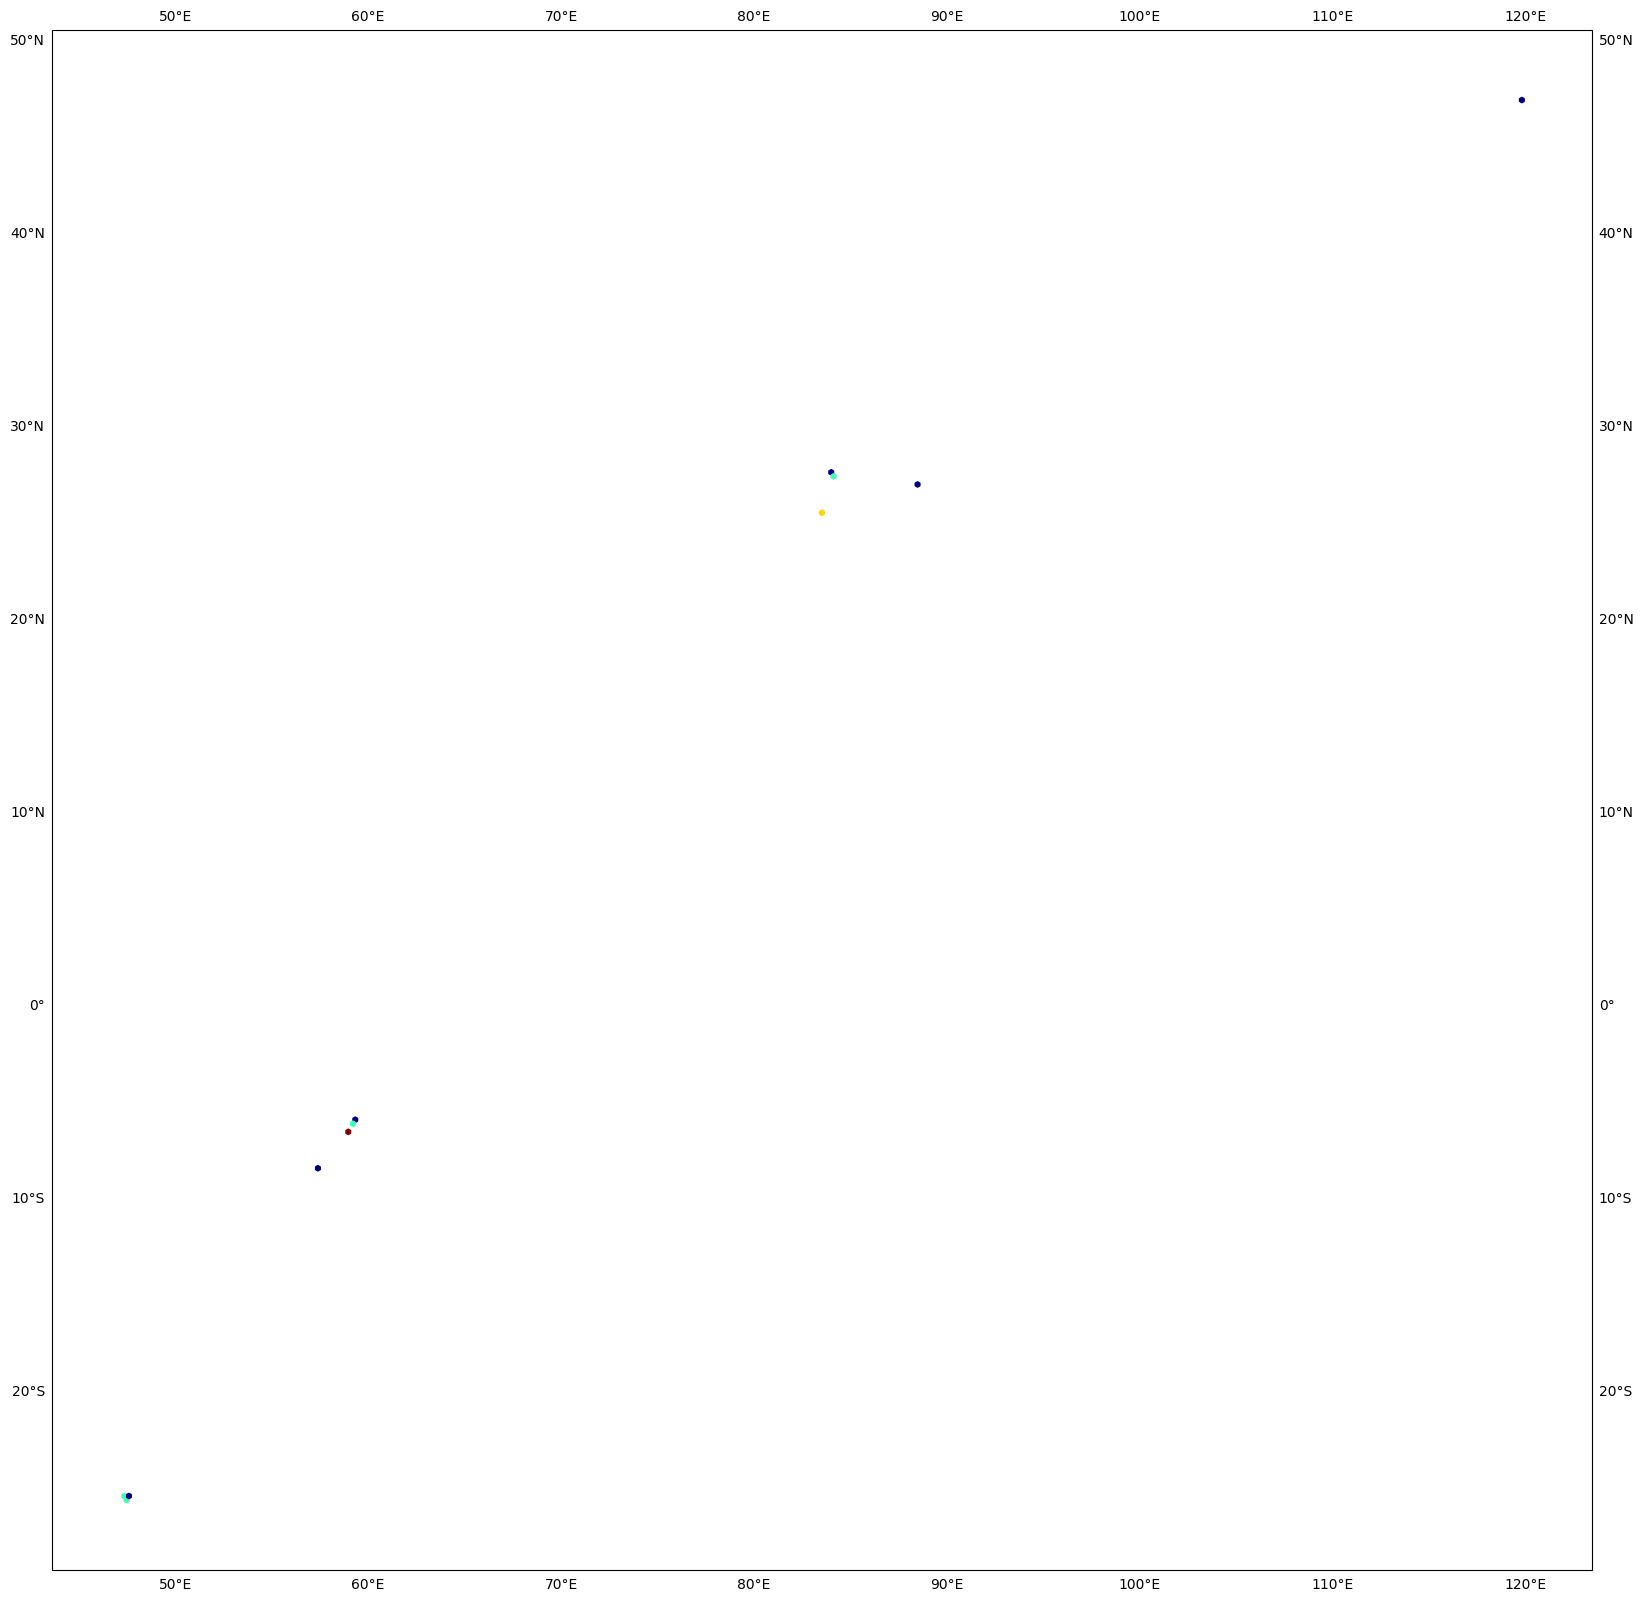

ISS_LIS_SC_V2.2_20230401_043402_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

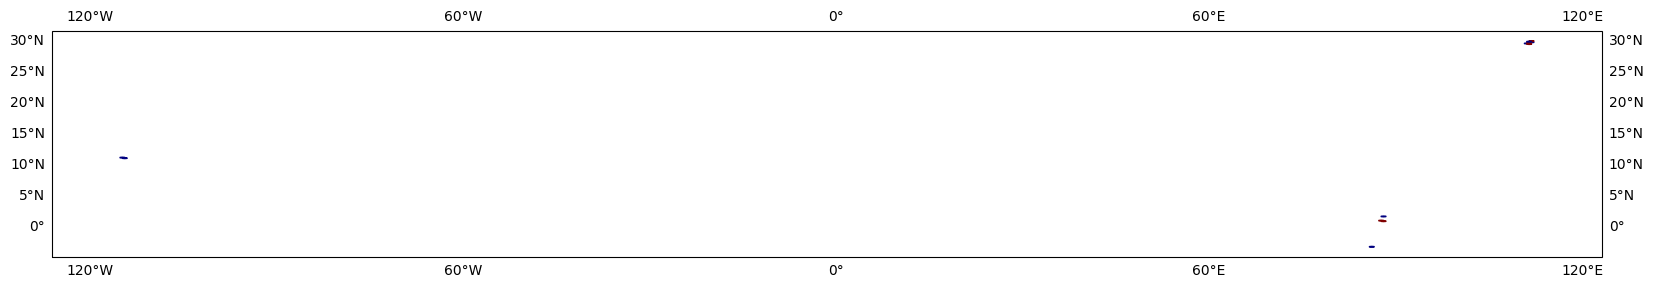

ISS_LIS_SC_V2.2_20230401_012816_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

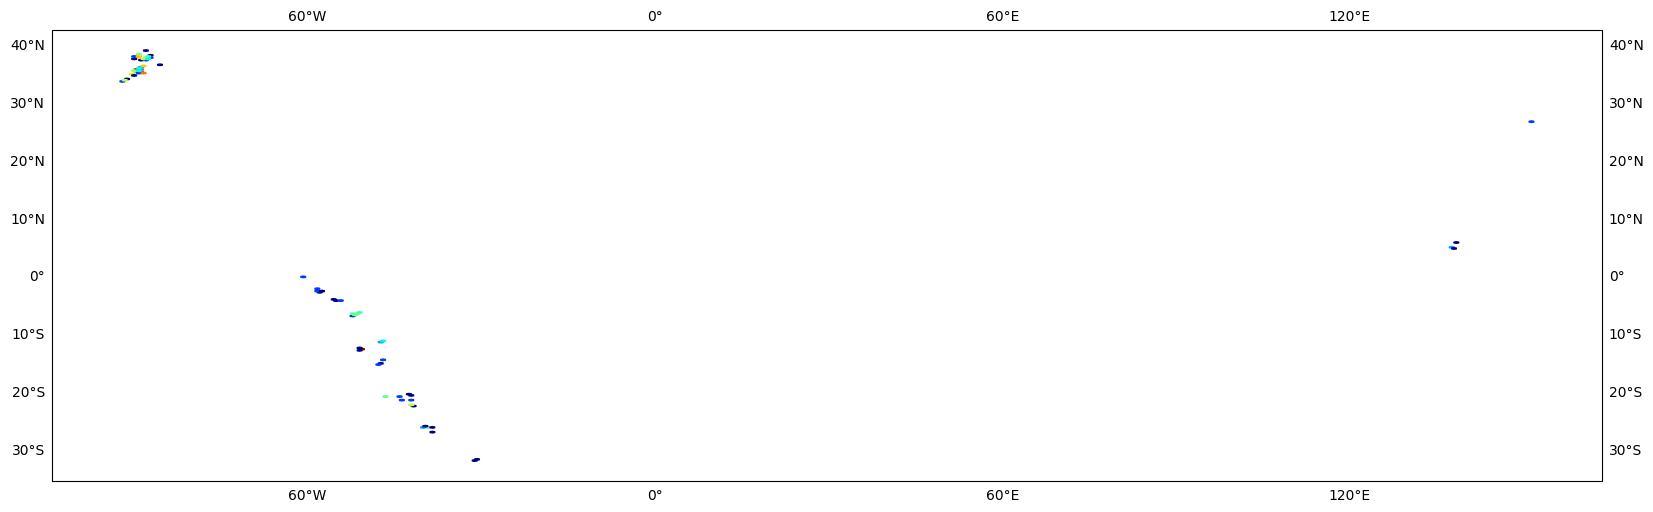

In [ ]:
# Loop through each file in the folder
for file_name in os.listdir(files):
    if file_name.endswith('.nc'):
        # Open the netCDF file
        dataset = Dataset(os.path.join(files, file_name))
        
        # Print the variable names
        print(file_name)
        print(dataset.variables.keys())
        
        # Get the latitude and longitude arrays
        lat = dataset.variables['lightning_flash_lat'][:]
        lon = dataset.variables['lightning_flash_lon'][:]
        
        # Create plot of lightning flash location heat map
        plt.figure(figsize=((20,20))) #Set plot dimensions
        map = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
        gl = map.gridlines(crs=ccrs.PlateCarree(central_longitude=0.0), draw_labels=True, linewidth=0.8, alpha=0.5, color='white', linestyle='--')
        lightning = map.hexbin(lon, lat, gridsize=300, bins='log',cmap='jet', mincnt=1 ,zorder=10) #Bin flash counts into hexbins using a gridsize of your choice
        
        # Show the plot
        plt.show()